In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hyperparameters & locations
</div>

In [2]:
locs = {'waiting_folder' : 'data/waiting times'}

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Reading the data
</div>

In [3]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:08<00:00,  5.91it/s]


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Cleaning the data
</div>

In [4]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1318703 rows


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Visualizing the data that we have in a very simple way
</div>

In [5]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,290934.0,76.962455,33.993364,0.0,50.0,70.0,95.0,300.0
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0
carousel_of_progress,36096.0,6.333389,3.586248,0.0,5.0,5.0,5.0,80.0
country_bears,10691.0,14.968665,8.613217,0.0,10.0,10.0,20.0,45.0
dinosaur,228624.0,27.399704,19.630231,0.0,10.0,20.0,40.0,300.0


In [6]:
df_wait_act.groupby('attraction')['SACTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,7634.0,36.166623,22.950125,0.0,21.0,31.0,46.00,217.0
alien_saucers,3031.0,22.068624,12.586751,0.0,13.0,21.0,30.00,79.0
astro_orbiter,1770.0,20.402260,9.501468,0.0,14.0,20.0,26.00,65.0
barnstormer,3087.0,12.528345,9.900399,0.0,5.0,11.0,18.00,70.0
big_thunder_mtn,11729.0,18.251513,12.913191,0.0,9.0,16.0,25.00,125.0
buzz_lightyear,7998.0,14.120780,12.355926,0.0,5.0,11.0,20.00,109.0
carousel_of_progress,876.0,4.179224,4.455348,0.0,1.0,2.0,6.00,33.0
country_bears,362.0,7.842541,7.213412,0.0,2.0,6.0,11.00,40.0
dinosaur,5059.0,20.197075,15.332370,0.0,8.0,17.0,29.00,96.0


In [8]:
# Function to Update Plots Based on Selected Attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  #Create a new figure
    plt.subplot(1, 2, 1)  # First subplot: Actual wait times
    df_wait_attraction = df_wait[df_wait["attraction"] == attraction]
    df_wait_attraction["SACTMIN"].plot.hist(bins=30, title="Actual Waiting Times", color="royalblue", alpha=0.7)
    
    plt.subplot(1, 2, 2)  # Second subplot: Posted wait times
    df_wait_attraction["SPOSTMIN"].plot.hist(bins=np.arange(-2.5, df_wait["SPOSTMIN"].max() + 2.5, 10),
                                             title="Posted Waiting Times",
                                             color="orange",
                                             alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [9]:
# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

C:\Users\PC Gebruiker\AppData\Local\Temp\ipykernel_26128\1575995553.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_a = df.query("attraction == @a and date == @date")
C:\Users\PC Gebruiker\AppData\Local\Temp\ipykernel_26128\1575995553.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_a = df.query("attraction == @a and date == @date")
C:\Users\PC Gebruiker\AppData\Local\Temp\ipykernel_26128\1575995553.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considere

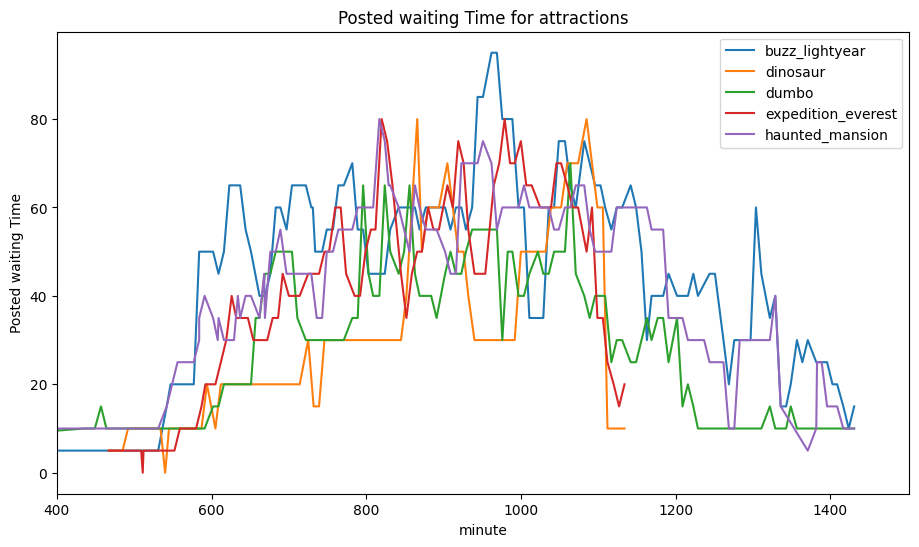

In [10]:
pd.options.mode.chained_assignment = None

def show_posted_waiting(df, date, attractions):
    fig, ax = plt.subplots(figsize=(11,6))
    
    for a in attractions:
        df_a = df.query("attraction == @a and date == @date")
        df_a['minutes'] = df_a['datetime'].dt.hour * 60 + df_a['datetime'].dt.minute
        df_a = df_a.sort_values(by='minutes')
        ax.plot(df_a['minutes'], df_a['SPOSTMIN'], label=a )
        # ax.plot(df_a['datetime'], df_a['SPOSTMIN'], label=a )
    
    ax.legend()
    ax.set_xlim(left=400)
    plt.xlabel('minute')
    plt.ylabel('Posted waiting Time')
    plt.title('Posted waiting Time for attractions')
        

the_attractions = ['buzz_lightyear','dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion' ]
a_date = '2015-01-01'

show_posted_waiting(df_wait_post, a_date, the_attractions)

In [11]:
df_wait_post.query("attraction == 'buzz_lightyear' and date == '2015-01-01'").tail(12)

C:\Users\PC Gebruiker\AppData\Local\Temp\ipykernel_26128\3059359256.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_wait_post.query("attraction == 'buzz_lightyear' and date == '2015-01-01'").tail(12)


,attraction,date,datetime,SPOSTMIN
1363104,buzz_lightyear,2015-01-01,2015-01-01 23:37:13,15.0
1363105,buzz_lightyear,2015-01-01,2015-01-01 23:44:14,10.0
1363106,buzz_lightyear,2015-01-01,2015-01-01 23:51:12,15.0
1363107,buzz_lightyear,2015-01-01,2015-01-02 00:02:16,15.0
1363108,buzz_lightyear,2015-01-01,2015-01-02 00:09:13,10.0
1363109,buzz_lightyear,2015-01-01,2015-01-02 00:16:15,10.0
1363110,buzz_lightyear,2015-01-01,2015-01-02 00:23:12,10.0
1363111,buzz_lightyear,2015-01-01,2015-01-02 00:29:12,10.0
1363112,buzz_lightyear,2015-01-01,2015-01-02 00:37:12,5.0
1363113,buzz_lightyear,2015-01-01,2015-01-02 00:44:13,5.0


In [12]:
df_wait_post['datetime']

0          2015-01-01 07:51:12
1          2015-01-01 08:02:13
3          2015-01-01 08:09:12
4          2015-01-01 08:16:12
6          2015-01-01 08:23:12
                   ...        
10306135   2021-12-28 22:34:35
10306136   2021-12-28 22:42:15
10306137   2021-12-28 22:48:12
10306138   2021-12-28 22:54:10
10306139   2021-12-28 23:00:27
Name: datetime, Length: 8795065, dtype: datetime64[ns]

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Step 3: Study for which attractions we have sufficient information for posted waiting time.
</div>

In [14]:
# Fill missing dates for each attraction
def complete_date_range(df):
    complete_dates = pd.date_range(start=df['date'].min(), end=df['date'].max())
    attractions = df['attraction'].unique()
    dfs = []
    
    for attraction in attractions:
        attraction_df = df[df['attraction'] == attraction].groupby('date').size().reindex(complete_dates, fill_value=0).reset_index()
        attraction_df.columns = ['date', 'count']
        attraction_df['attraction'] = attraction
        dfs.append(attraction_df)
    
    return pd.concat(dfs)

# Apply date completion
df_completed = complete_date_range(df_wait)

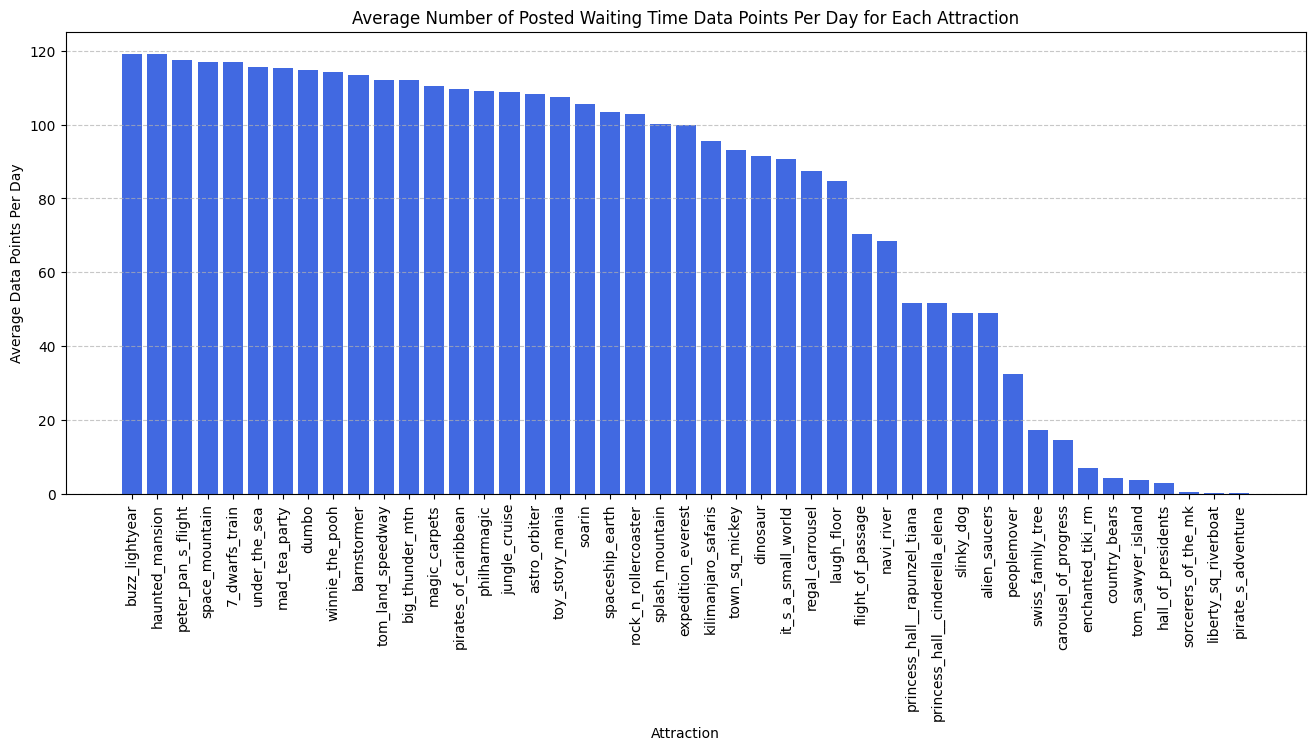

In [16]:
# Ortalama günlük veri noktası hesapla
average_counts = df_completed.groupby("attraction")["count"].mean().reset_index()
average_counts = average_counts.sort_values(by="count", ascending=False)

# Step 2: Visualizing the data
plt.figure(figsize=(16, 6))
plt.bar(average_counts['attraction'], average_counts['count'], color='royalblue')
plt.xlabel("Attraction")
plt.ylabel("Average Data Points Per Day")
plt.title("Average Number of Posted Waiting Time Data Points Per Day for Each Attraction")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Step 4: Study the distribution of data availability for actual waiting time information.
</div>

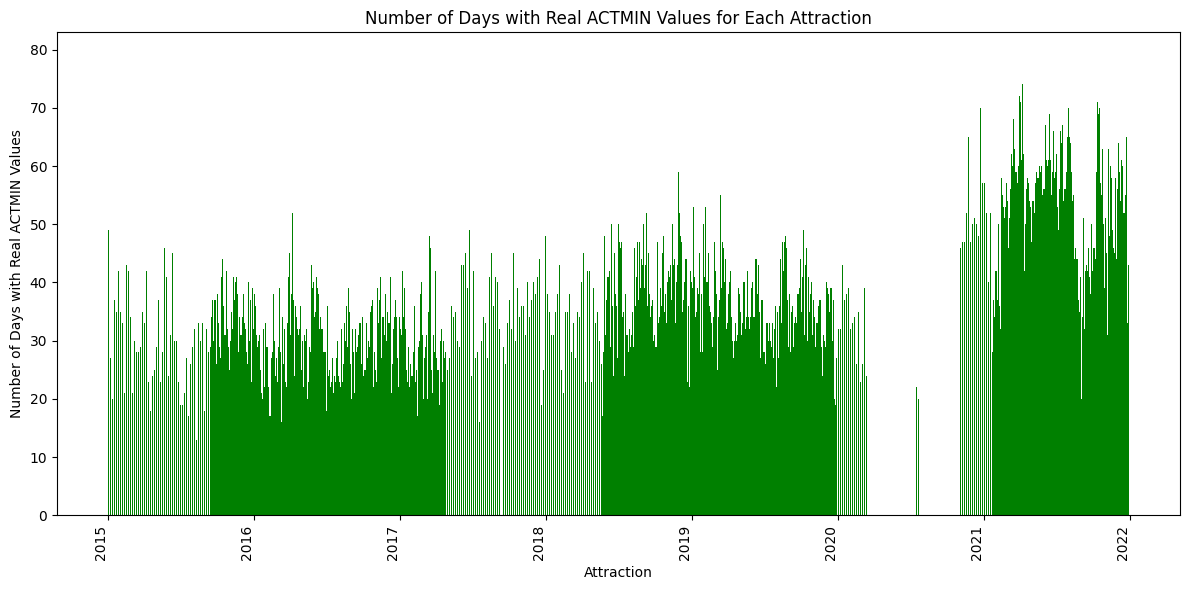

In [26]:
# Group by attraction and date, and count unique dates
days_with_real_values = df_wait.groupby('date')['SACTMIN'].nunique().reset_index(name='day_has_real_values')

df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

days_with_real_values_f= days_with_real_values[days_with_real_values['date'].dt.year == 2016]
# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(days_with_real_values['date'], days_with_real_values['day_has_real_values'], color='green')

# Customize the plot
plt.xlabel('Attraction')
plt.ylabel('Number of Days with Real ACTMIN Values')
plt.title('Number of Days with Real ACTMIN Values for Each Attraction')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [30]:
from scipy.interpolate import interp1d

In [34]:
# Reset index before grouping
df_wait = df_wait.reset_index(drop=True)

In [35]:


# Research Question 1: Compare predicted and actual waiting time
# Interpolating posted waiting time
def interpolate_posted_wait(df):
    df_sorted = df.sort_values("datetime")
    timestamps = df_sorted["datetime"].astype(np.int64) // 10**9  # Convert datetime to epoch time
    if len(timestamps) < 2:
        df["Interpolated_SPOSTMIN"] = np.nan  # Avoid interpolation with less than 2 points
        return df
    interp_func = interp1d(timestamps, df_sorted["SPOSTMIN"], kind='linear', fill_value='extrapolate')
    df["Interpolated_SPOSTMIN"] = interp_func(df["datetime"].astype(np.int64) // 10**9)
    return df

df_wait = df_wait.groupby("attraction", group_keys=False, as_index=False).apply(interpolate_posted_wait)
df_wait["Wait_Difference"] = df_wait["SACTMIN"] - df_wait["Interpolated_SPOSTMIN"]


C:\Users\PC Gebruiker\AppData\Local\Temp\ipykernel_26128\3319353540.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_wait = df_wait.groupby("attraction", group_keys=False, as_index=False).apply(interpolate_posted_wait)


In [37]:
import seaborn as sns

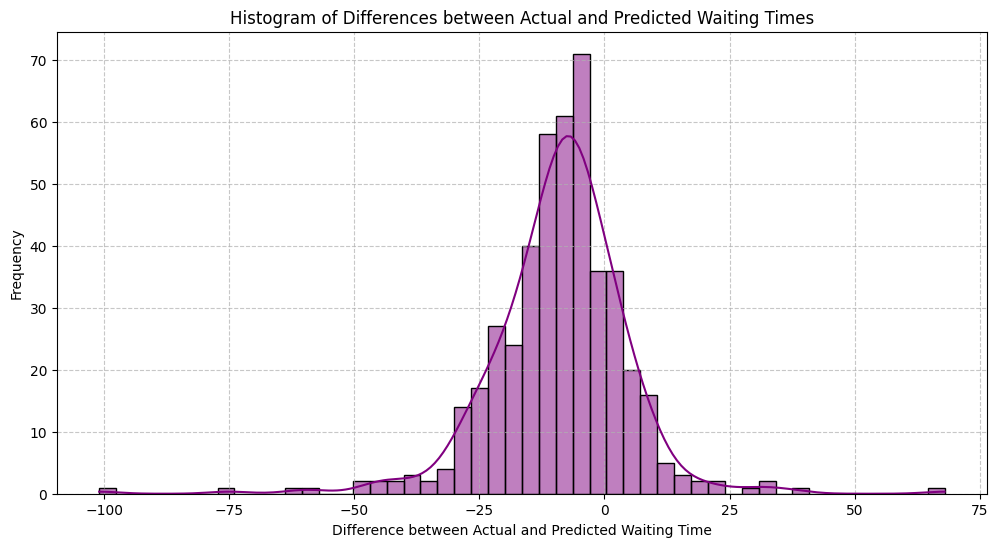

In [38]:
# Visualizing Differences
plt.figure(figsize=(12, 6))
sns.histplot(df_wait["Wait_Difference"].dropna(), bins=50, kde=True, color='purple')
plt.xlabel("Difference between Actual and Predicted Waiting Time")
plt.ylabel("Frequency")
plt.title("Histogram of Differences between Actual and Predicted Waiting Times")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

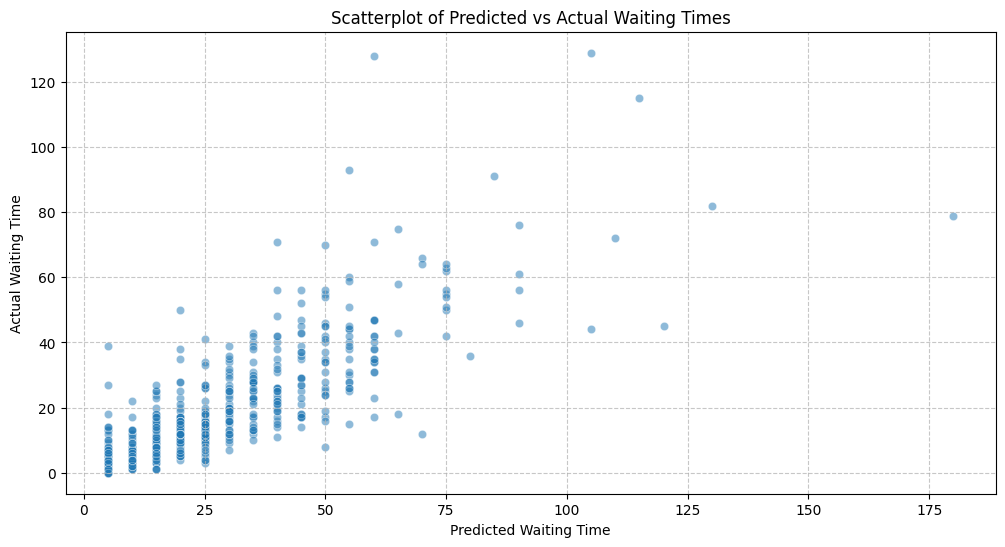

In [39]:


# Scatter plot of actual vs predicted wait times
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_wait["Interpolated_SPOSTMIN"], y=df_wait["SACTMIN"], alpha=0.5)
plt.xlabel("Predicted Waiting Time")
plt.ylabel("Actual Waiting Time")
plt.title("Scatterplot of Predicted vs Actual Waiting Times")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [49]:
if 'category_code' not in df_wait.columns:
    df_wait['category_code'] = 'ride' 

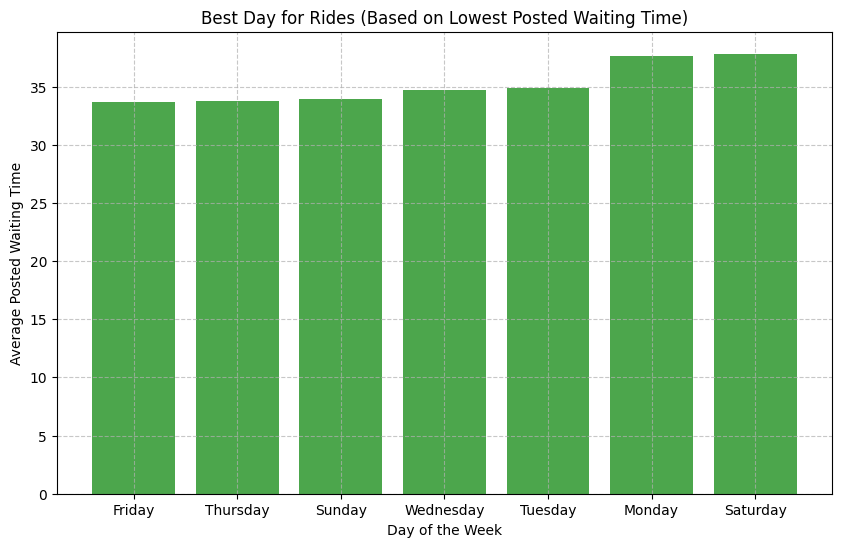

In [50]:
# Research Question 2: Best day for rides
rides_df = df_wait[df_wait['category_code'] == 'ride']
rides_df['day_of_week'] = rides_df['date'].dt.day_name()

avg_wait_per_day = rides_df.groupby('day_of_week')["SPOSTMIN"].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(avg_wait_per_day.index, avg_wait_per_day.values, color='green', alpha=0.7)
plt.xlabel("Day of the Week")
plt.ylabel("Average Posted Waiting Time")
plt.title("Best Day for Rides (Based on Lowest Posted Waiting Time)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [46]:
if 'HOLIDAYM' not in df_wait.columns:
    df_wait['HOLIDAYM'] = 'Non-Holiday'  # Varsayılan değer olarak ekle


In [51]:
print(df_wait.columns)


Index(['attraction', 'date', 'datetime', 'SACTMIN', 'SPOSTMIN',
       'Interpolated_SPOSTMIN', 'Wait_Difference', 'category_code',
       'HOLIDAYM'],
      dtype='object')


In [53]:
print(df_wait["HOLIDAYM"].dtype)


object


In [56]:
print(df_wait["HOLIDAYM"].unique())


['Non-Holiday']


In [55]:
df_wait["HOLIDAYM"] = df_wait["HOLIDAYM"].replace({np.nan: "Non-Holiday", "": "Non-Holiday"})


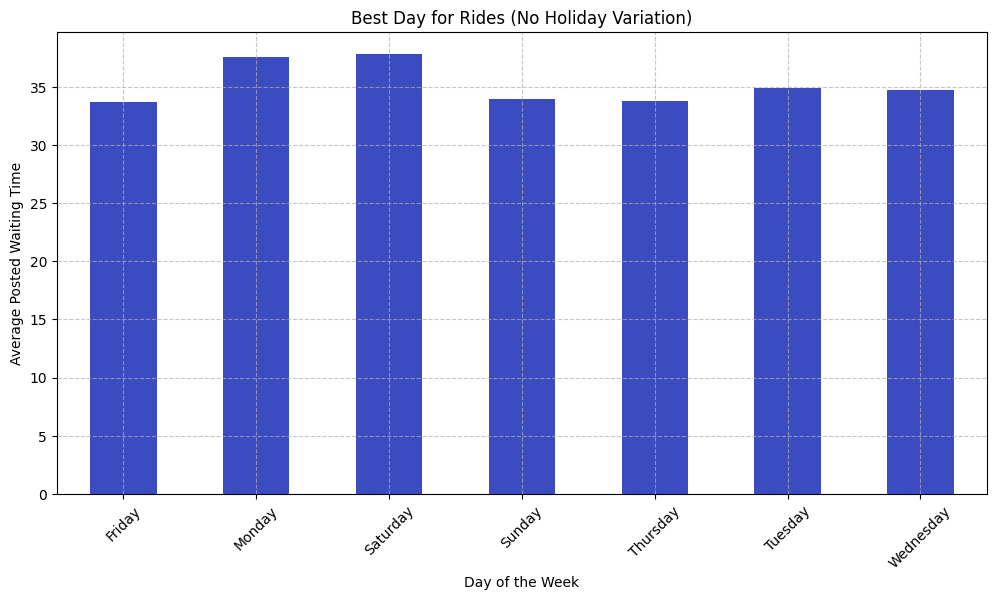

In [57]:
day_holiday_analysis = rides_df.groupby('day_of_week')['SPOSTMIN'].mean()

# Yeni grafiği oluştur
plt.figure(figsize=(12,6))
day_holiday_analysis.plot(kind='bar', colormap='coolwarm')
plt.xlabel("Day of the Week")
plt.ylabel("Average Posted Waiting Time")
plt.title("Best Day for Rides (No Holiday Variation)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
